In [8]:
import os, shutil

In [9]:
original_dataset_dir ='C:/Users/SAYYED BASHAR ALI/Desktop/DSP/total images'

In [10]:
base_dir = 'D:/Minor project/crack_model'
os.mkdir(base_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model'

In [11]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\train'

In [12]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\validation'

In [13]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\test'

In [14]:
train_crack_dir = os.path.join(train_dir, 'crack')
os.mkdir(train_crack_dir)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\train\\crack'

In [15]:
train_no_crack_dir = os.path.join(train_dir, 'no crack')
os.mkdir(train_no_crack_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\train\\no crack'

In [16]:
validation_crack_dir = os.path.join(validation_dir, 'crack')
os.mkdir(validation_crack_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\validation\\crack'

In [17]:
validation_no_crack_dir = os.path.join(validation_dir, 'no crack')
os.mkdir(validation_no_crack_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\validation\\no crack'

In [18]:
test_crack_dir = os.path.join(test_dir, 'crack')
os.mkdir(test_crack_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\test\\crack'

In [19]:
test_no_crack_dir = os.path.join(test_dir, 'no crack')
os.mkdir(test_no_crack_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Minor project/crack_model\\test\\no crack'

In [20]:
print('total training crack  images:', len(os.listdir(train_crack_dir)))
print('total training no crack images:', len(os.listdir(train_no_crack_dir)))


print('total validation crack images:', len(os.listdir(validation_crack_dir)))
print('total validation no crack images:', len(os.listdir(validation_no_crack_dir)))

print('total test crack images:', len(os.listdir(test_crack_dir)))
print('total test no crack images:', len(os.listdir(test_no_crack_dir)))


total training crack  images: 800
total training no crack images: 801
total validation crack images: 100
total validation no crack images: 101
total test crack images: 101
total test no crack images: 100


In [ ]:
from keras import layers
from keras import models

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(227, 227),
                                                        batch_size=20,
                                                        class_mode='categorical')

In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

In [ ]:
import tensorflow as tf



In [ ]:
IMG_SHAPE = (227, 227, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
feature_batch = base_model(data_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(2)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
sgd = tf.keras.optimizers.SGD(lr=1e-6, decay=1e-6, momentum=1, nesterov=True)
model.compile(optimizer=sgd,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
len(model.trainable_variables)

2

In [29]:
initial_epochs = 20
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)

11/11 [==============================] - 7s 652ms/step - loss: 0.7943 - acc: 0.3184


In [30]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.79
initial accuracy: 0.32


In [31]:
history = model.fit(train_generator,
                    epochs=initial_epochs,
                    validation_data=validation_generator)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
81/81 [==============================] - 208s 3s/step - loss: 0.7134 - acc: 0.5384 - val_loss: 0.7973 - val_acc: 0.2935
Epoch 2/20
81/81 [==============================] - 187s 2s/step - loss: 0.7013 - acc: 0.5653 - val_loss: 0.7877 - val_acc: 0.3582
Epoch 3/20
81/81 [==============================] - 204s 3s/step - loss: 0.6868 - acc: 0.5903 - val_loss: 0.7830 - val_acc: 0.3881
Epoch 4/20
81/81 [==============================] - 190s 2s/step - loss: 0.6708 - acc: 0.6171 - val_loss: 0.7821 - val_acc: 0.4328
Epoch 5/20
81/81 [==============================] - 158s 2s/step - loss: 0.6462 - acc: 0.6590 - val_loss: 0.7761 - val_acc: 0.4627
Epoch 6/20
81/81 [==============================] - 142s 2s/step - loss: 0.6136 - acc: 0.7202 - val_loss: 0.7588 - val_acc: 0.5124
Epoch 7/20
81/81 [==============================] - 156s 2s/step - loss: 0.5888 - acc: 0.7620 - val_loss: 0.7344 - val_acc: 0.5672
Epoch 8/20
81/81 [=================

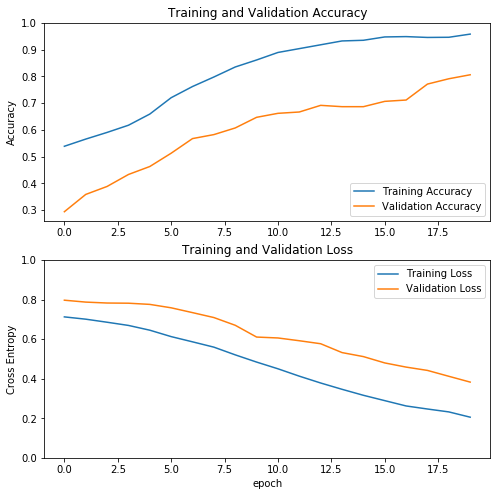

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc= history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [86]:
base_model.trainable = True

In [87]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [88]:
sgd = tf.keras.optimizers.SGD(lr=(1e-6)/2, decay=(1e-6)/2, momentum=1, nesterov=True)
model.compile(optimizer=sgd,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [89]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_generator)

Epoch 10/20
86/86 [==============================] - 86s 998ms/step - loss: 0.3137 - acc: 0.2043 - val_loss: 0.4141 - val_acc: 0.1602
Epoch 11/20
86/86 [==============================] - 83s 963ms/step - loss: 0.3112 - acc: 0.2090 - val_loss: 0.4134 - val_acc: 0.1602
Epoch 12/20
86/86 [==============================] - 88s 1s/step - loss: 0.3006 - acc: 0.1997 - val_loss: 0.4112 - val_acc: 0.1602
Epoch 13/20
86/86 [==============================] - 83s 969ms/step - loss: 0.3023 - acc: 0.2020 - val_loss: 0.4076 - val_acc: 0.1547
Epoch 14/20
86/86 [==============================] - 83s 964ms/step - loss: 0.2852 - acc: 0.2072 - val_loss: 0.3752 - val_acc: 0.1547
Epoch 15/20
86/86 [==============================] - 84s 974ms/step - loss: 0.3043 - acc: 0.2002 - val_loss: 0.3700 - val_acc: 0.1602
Epoch 16/20
86/86 [==============================] - 83s 966ms/step - loss: 0.2726 - acc: 0.1898 - val_loss: 0.3684 - val_acc: 0.1492
Epoch 17/20
86/86 [==============================] - 85s 983ms/st

In [38]:
img_path='C:/Users/SAYYED BASHAR ALI/Desktop/12307_1.jpg'

In [39]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path,target_size=(227,227))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)

(1, 227, 227, 3)


In [40]:
y=model.predict(img_tensor)

In [41]:
class_name=['Crack','No Crack']
a=np.argmax(y)
if y[0][a]>0:
    
    print(class_name[a])
else:
    print("Not found")

Crack


In [42]:
print(y)

[[ 0.9483551  -0.14690745]]
